In [ ]:
# Mrityunjay kumar # 
# TensorFlow 5 - Activation Function + Defining Add_Layer() + Building Network + Visualization 

In [2]:
import matplotlib
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
#defining the structure of a layer

def add_layer(inputs,in_size,out_size,activation_function=None):
    #inputs from previous layer
    #in_size: size(number of neurons) of previous layer
    #out_size: size(number of neurons) of this layer
    #activation_function: used in this layer
    Weights = tf.compat.v1.Variable(tf.compat.v1.random_normal([in_size,out_size]))
    biases = tf.compat.v1.Variable(tf.compat.v1.zeros([1,out_size])+0.1)
    logit = tf.compat.v1.matmul(inputs,Weights) + biases
    if activation_function is None:
        output = logit
    else:
        output = activation_function(logit)
    return output

In [17]:
#make up some real data
x = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x.shape)
y = np.square(x)-0.05+noise

In [32]:
#plt.scatter(x,y)
#plt.show()

In [18]:
tf.compat.v1.disable_eager_execution()

#define placeholder for inputs to network
xs = tf.compat.v1.placeholder(tf.compat.v1.float32,[None,1])  #numerous rows and 1 column : structure of x
ys = tf.compat.v1.placeholder(tf.compat.v1.float32,[None,1])  #numerous rows and 1 column : structure of y

In [19]:
#add hidden layer
layer1 = add_layer(xs,1,10,tf.compat.v1.nn.relu)#input size has one feature(unit)&the next hidden layer consists of 10 units

In [20]:
#add output layer
predicted = add_layer(layer1,10,1)#layer one had 10 units, output ys has 1 unit and since non linear regression
                                  #therefore, no activation function (try and put some activation function and 
                                  #check the results)

In [23]:
#error between prediction and real data
loss = tf.compat.v1.reduce_mean(tf.compat.v1.reduce_sum(tf.square(predicted-ys),reduction_indices=[1]))
training = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)  #0.1 is the learning rate, minimise the loss

In [24]:
#important
init = tf.compat.v1.initialize_all_variables()
sess = tf.compat.v1.Session()
sess.run(init)

W0116 21:49:06.703929 4440675776 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


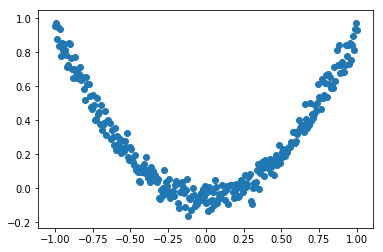

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  #1 row,1 column and 1 figure
ax.scatter(x,y)
plt.ion()
plt.show()

for i in range(1000):
    #training
    sess.run(training,feed_dict={xs:x,ys:y})
    if i%50==0:
        #to see step improvement
        #print sess.run(loss,feed_dict={xs:x,ys:y})
        try:
            ax.lines.remove(lines[0])
        except Exception:   #handles exception in the 1st case when there is no line but tries to remove that time
            pass
        y_predicted=sess.run(predicted,feed_dict={xs:x})
        #plot that
        lines=ax.plot(x,y_predicted,'r-',lw=5)
        plt.pause(0.05)